<h1>Analyzing the dataset we created to extract relevant information

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv('../mitbih_beats.csv')
data.head()

,samp_0,samp_1,samp_2,samp_3,samp_4,samp_5,samp_6,samp_7,samp_8,samp_9,...,samp_83,samp_84,samp_85,samp_86,samp_87,samp_88,samp_89,samp_90,rr_interval,label
0,-0.520,-0.525,-0.525,-0.545,-0.560,-0.580,-0.600,-0.625,-0.645,-0.620,...,-0.745,-0.750,-0.745,-0.745,-0.755,-0.745,-0.76,-0.775,766.666667,N
1,-0.490,-0.510,-0.515,-0.535,-0.555,-0.560,-0.580,-0.605,-0.595,-0.605,...,-0.720,-0.735,-0.725,-0.730,-0.740,-0.745,-0.76,-0.755,775.000000,N
2,-0.400,-0.415,-0.440,-0.455,-0.475,-0.490,-0.510,-0.535,-0.540,-0.540,...,-0.700,-0.700,-0.695,-0.705,-0.705,-0.715,-0.73,-0.735,763.888889,N
3,-0.485,-0.495,-0.510,-0.510,-0.510,-0.530,-0.545,-0.565,-0.585,-0.590,...,-0.765,-0.750,-0.740,-0.745,-0.735,-0.740,-0.75,-0.755,755.555556,N
4,-0.525,-0.550,-0.560,-0.580,-0.600,-0.615,-0.635,-0.635,-0.645,-0.640,...,-0.760,-0.760,-0.765,-0.770,-0.785,-0.780,-0.79,-0.790,744.444444,N


In [26]:
len(data) # number of individual beats

106710

### We can clearly see a disproportianate amount of (N)ormal beats in the dataset which is not good for training
_We will need to appropriately preprocess the data._

In [27]:
data['label'].value_counts(normalize=True) * 100 # Percentage of each label's occurance in the dataset

label
N    68.759254
L     7.526942
V     6.503608
/     6.457689
R     6.387405
A     2.244401
f     0.898697
F     0.745010
j     0.212726
a     0.137757
J     0.077781
Q     0.030925
e     0.014994
S     0.001874
E     0.000937
Name: proportion, dtype: float64

### The signal's original form is maintained in the dataset

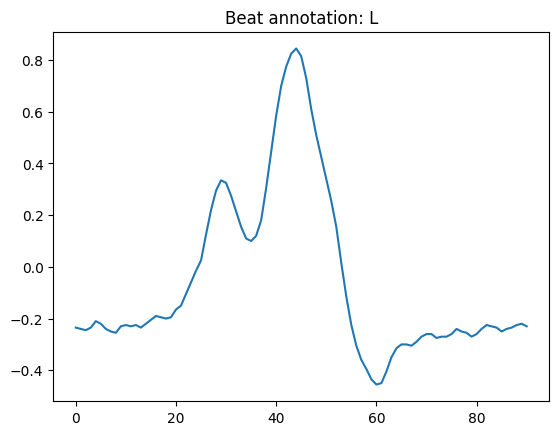

In [28]:
sample_row = data.iloc[3002].to_list()
sample_beat = sample_row[:-2] # Last 2 elements are the R-R interval and label respectively
beat_annotation = sample_row[-1]

plt.title(f'Beat annotation: {beat_annotation}')
plt.plot(sample_beat)
plt.show()

### A look at the R-R intervals

In [29]:
# Lines up with average R-R intervals from medical sources (600-1200 milliseconds)
# https://emedicine.medscape.com/article/2172196-overview?form=fpf

data['rr_interval'].mean()

np.float64(790.5083351555098)

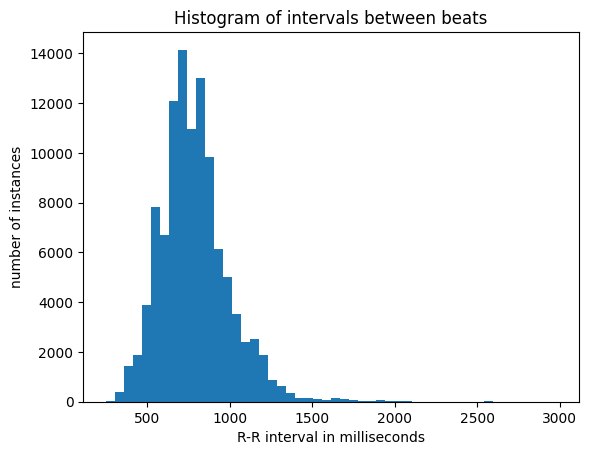

In [40]:
# A rough normal distribution around the mean ~800 ms with some outliers (all the way to 10,000 ms)

rr_intervals = [x for x in data['rr_interval'].to_list() if x < 3000]
plt.title("Histogram of intervals between beats")
plt.hist(rr_intervals, bins=50)
plt.xlabel("R-R interval in milliseconds")
plt.ylabel("number of instances")
plt.show()